# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['1010110010', '1110111000', '1010010101', '1101111010', '0101010111', '0001010110', '0111111011', '1010111100']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['1010010101', '1010010101', '1010010101', '1010010101', '0111111011', '1010111100', '1010111100', '1010010101']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['11000', '00111', '10000', '01111', '10000', '01111', '10000', '01111']

Mutation:
 ['11111', '01000', '11110', '10000', '01111', '00000', '11111', '00000']


A new generation:
 ['10000', '01111', '10000', '01011', '10000', '01110', '10110', '10001']


## 2: Demo GA - Sine [0, 128]

In [6]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': False
    }
algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log = algorithm_2.run()

Algorithm succsessfully executed


In [7]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')
        

Generation: 0 

Population: ['111111111100000', '100100100000100', '001011001101100', '100000001011011', '011001101110000', '110011100111100', '000110101101001', '101011011000000', '001010110111101', '110100001010011', '111100110101001', '001100000110111', '101001001010000', '000010100011111', '100011010001101', '100000101110011', '101001110000001', '001100111101110', '011010111001100', '111111000000111'] 

Population real value: [127.875       73.015625    22.421875    64.35546875  51.4375
 103.234375    13.41015625  86.75        21.73828125 104.32421875
 121.66015625  24.21484375  82.3125       5.12109375  70.55078125
  65.44921875  83.50390625  25.9296875   53.796875   126.02734375] 

Population sine fitness value: ['0.80', '-0.69', '-0.42', '1.00', '0.92', '0.42', '0.75', '-0.94', '0.25', '-0.61', '0.76', '-0.79', '0.59', '-0.92', '0.99', '0.50', '0.97', '0.72', '-0.38', '0.36'] 


Generation: 10 

Population: ['100000011011010', '100001101100101', '101001001010011', '1110010011000

<IPython.core.display.Javascript object>


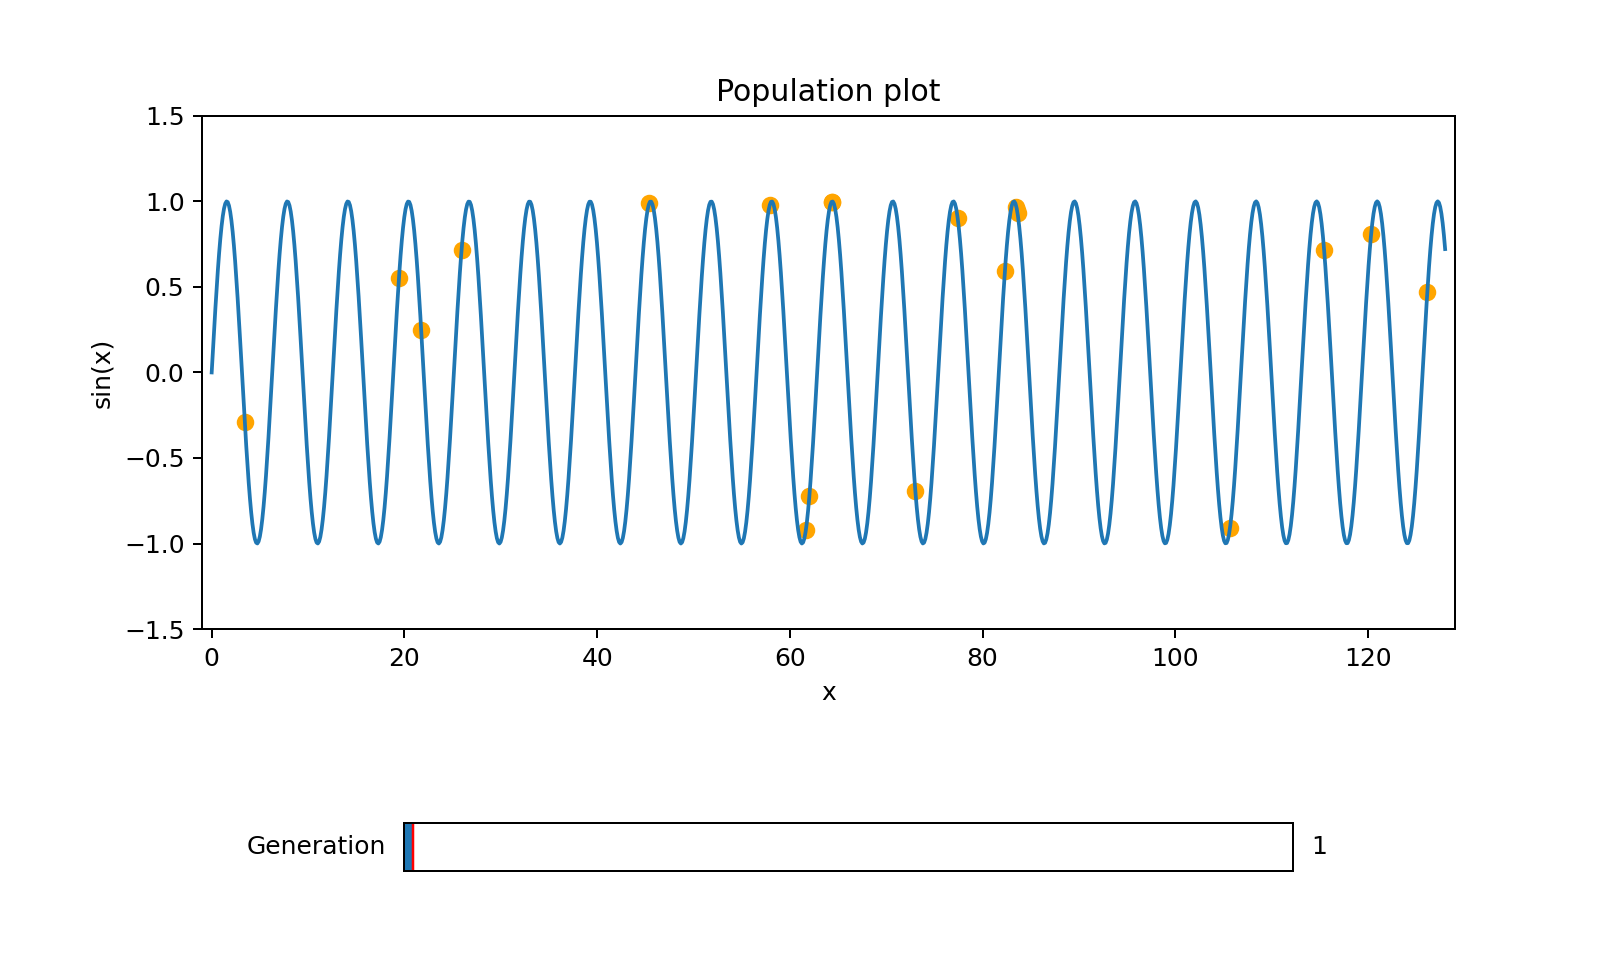

0

In [8]:
# Plot the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = eval_log[i][0]
y = eval_log[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[eval_log[gen][0], eval_log[gen][1]])

generation.on_changed(update)


    


## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [9]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


Algorithm succsessfully executed


In [10]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_3.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')

Generation: 0 

Population: ['000010110111100', '110000001010101', '101100100111101', '101001100011001', '101010011000010', '001110001011110', '001110001100010', '011000101111001', '011111001101100', '001100011101101', '101010010100100', '001000100001101', '111100101100100', '010001110011010', '000000010010010', '101100101110010', '111001110010111', '110110100010101', '001110001110010', '110001011111011'] 

Population real value: [  5.734375    96.33203125  89.23828125  83.09765625  84.7578125
  28.3671875   28.3828125   49.47265625  62.421875    24.92578125
  84.640625    17.05078125 121.390625    35.6015625    0.5703125
  89.4453125  115.58984375 109.08203125  28.4453125   98.98046875] 

Population sine fitness value: ['-0.52', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25'] 


Generation: 10 

Population: ['010001110010001', '111110000000000', '101011110010111',

<IPython.core.display.Javascript object>


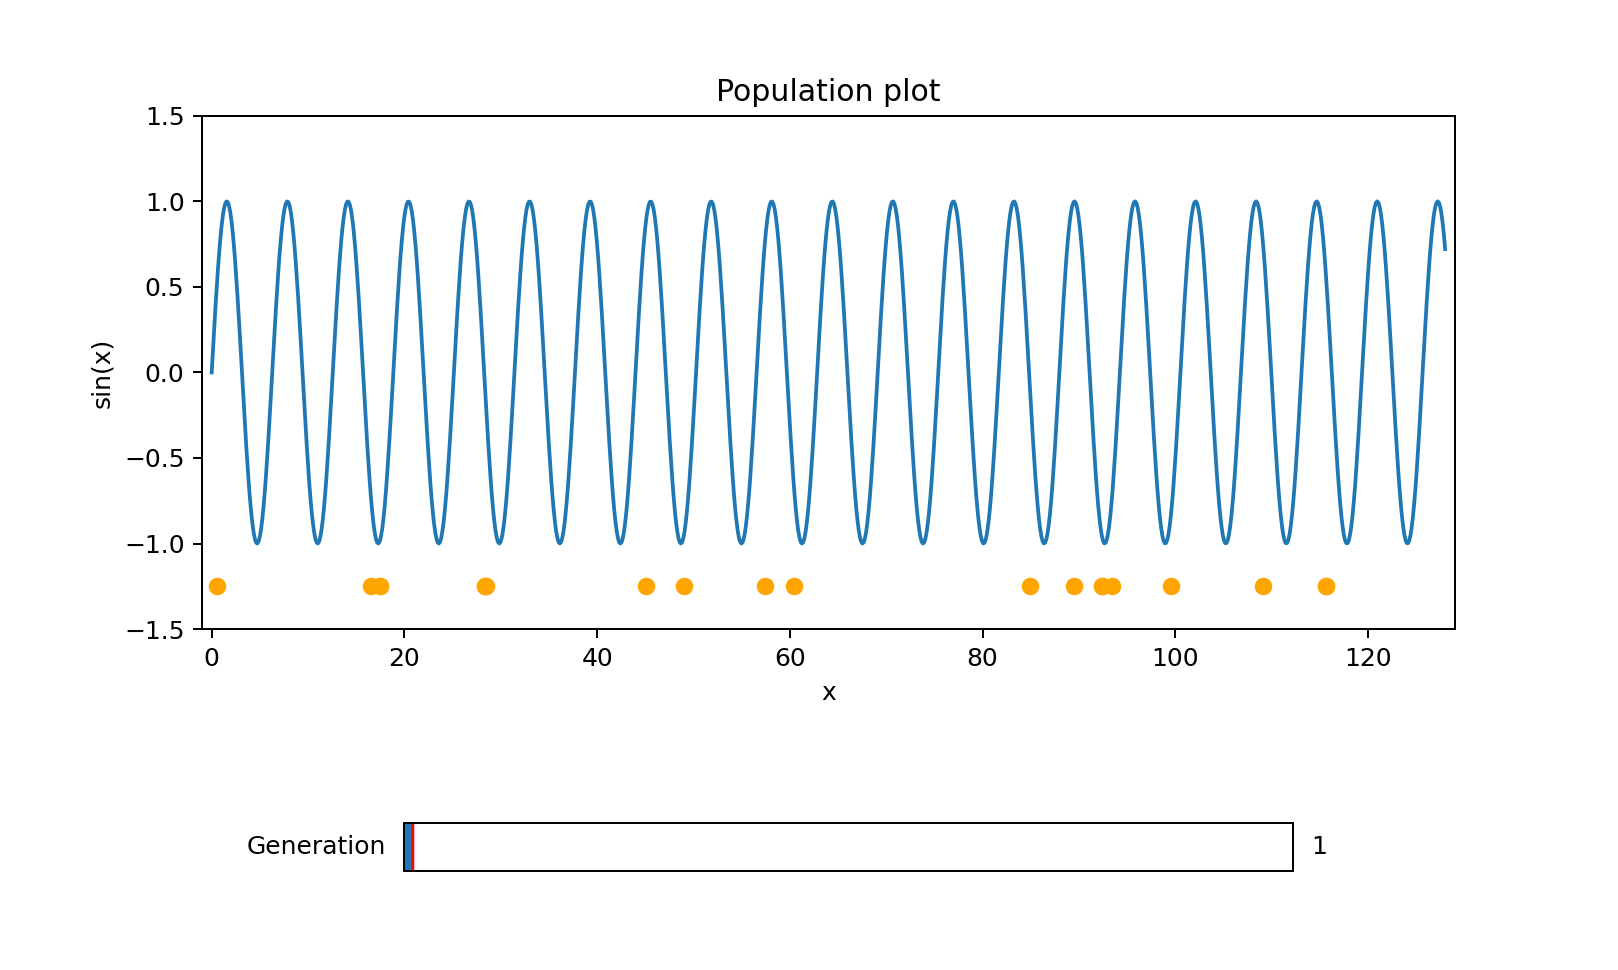

0

In [11]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][0]
y = DATA[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][0], DATA[gen][1]])

generation.on_changed(update)


## 4: Demo GA - Feature selection

In [12]:
# View data set

data_df = pd.read_csv('data/data.csv', index_col=[0])
values_df = pd.read_csv('data/values.csv', index_col=[0])
display(data_df, values_df)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,28.0,10.0,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,...,0.01,0.75,0.57,0.74,0.71,0.03,0.17,0.02,0.00,0.19
1989,12.0,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6.0,10.0,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9.0,10.0,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,6.0,10.0,0.2,0.78,0.14,0.46,0.24,0.77,0.5,0.62,...,0.68,0.5,0.34,0.35,0.68,0.11,0.3,0.05,1.0,0.48


In [13]:
params_4 = {
        'indiv_len': 102,
        'pop_size': 4,              # Has to be even
        'num_parents':4,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 5, 
        'sine_constraint': False
    }

algorithm_4 = GA(params_4, fitness=feature_fitness)

In [14]:
# Test regression class
import LinReg

test_pop = algorithm_4.init_pop()
#print(test_pop)

linreg = LinReg.LinReg()
#feats = values_df.to_numpy().shape[1]
#x = data_df.to_numpy().reshape(feats, data_df.to_numpy().shape[0])
#y = values_df.to_numpy().reshape(feats, 1)
#linreg.train(x, y)
errors = []
for indiv in test_pop:
    x = linreg.get_columns(data_df, indiv)
    y = linreg.get_columns(values_df, indiv)
    #print(x.shape, y.shape)
    feats = y.shape[1]
    x = x.reshape(feats, x.shape[0])
    y = y.reshape(feats, 1)
    error = linreg.get_fitness(x, y)
    errors.append(error)
    #print(error)
    

In [15]:
eval_log_4 = algorithm_4.run()

Algorithm succsessfully executed


In [16]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_4.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population RMSE:', data[0], '\n')
        print('Population fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')

Generation: 0 

Population: ['010111001010001101101011001101000100101100001000010100101000100100111011110101100111111101110000001010', '100001111010000111110101001101110111111011111011000111111110111101111110110011000101101110001010011111', '000101000010100001000101100100100011100010111111000100000111010001001011011110011110011010000111100001', '010011110000100000011100110000101010010001000110110111000010100010100101000001101000011100011110110000'] 

Population RMSE: [2.825487634467164, 1.479327306310395, 0.22395533088114908, 2.8750071496685368] 

Population fitness value: ['7.45', '7.84', '8.20', '7.44'] 


